SSA to tail call function program

analgous to supercompilation? functional logic programming?

Arguably, Twee/KB is more appropriate than using an egraph.

What about the cranelift equational instruction selector



In [10]:
%%file /tmp/ex1.c
#include<stdint.h>

int64_t myfun(int64_t x){
    return 2*x + 3;
}

Overwriting /tmp/ex1.c


In [11]:
!clang /tmp/ex1.c -c -emit-llvm -S -o /tmp/ex1.ll

In [12]:
!cat /tmp/ex1.ll

; ModuleID = '/tmp/ex1.c'
source_filename = "/tmp/ex1.c"
target datalayout = "e-m:e-p270:32:32-p271:32:32-p272:64:64-i64:64-i128:128-f80:128-n8:16:32:64-S128"
target triple = "x86_64-pc-linux-gnu"

; Function Attrs: noinline nounwind optnone uwtable
define dso_local i64 @myfun(i64 noundef %0) #0 {
  %2 = alloca i64, align 8
  store i64 %0, ptr %2, align 8
  %3 = load i64, ptr %2, align 8
  %4 = mul nsw i64 2, %3
  %5 = add nsw i64 %4, 3
  ret i64 %5
}

attributes #0 = { noinline nounwind optnone uwtable "frame-pointer"="all" "min-legal-vector-width"="0" "no-trapping-math"="true" "stack-protector-buffer-size"="8" "target-cpu"="x86-64" "target-features"="+cmov,+cx8,+fxsr,+mmx,+sse,+sse2,+x87" "tune-cpu"="generic" }

!llvm.module.flags = !{!0, !1, !2, !3, !4}
!llvm.ident = !{!5}

!0 = !{i32 1, !"wchar_size", i32 4}
!1 = !{i32 8, !"PIC Level", i32 2}
!2 = !{i32 7, !"PIE Level", i32 2}
!3 = !{i32 7, !"uwtable", i32 2}
!4 = !{i32 7, !"frame-pointer", i32 2}
!5 = !{!"Ubuntu clang version 18.0

In [ ]:
import llvmlite.binding
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()
with open("/tmp/myfun.ll") as f:
    prog = f.read()
module = llvmlite.binding.parse_assembly(prog)
#print(dir(module))
for func in module.functions:
    print(func)
    print(dir(func))
    for block in func.blocks:
        print(dir(block))
        G.add_node("block" + block.name)
        for insn in block.instructions:
            print(insn)
            print(insn.opcode)
            operands = list(insn.operands)
            dst = operands[0]
            print("dst", dst.name)
            srcs = operands[1:]
            for src in srcs:
                print(src)
                G.add_edge(src.name, insn.opcode)
            G.add_edge(insn.opcode, dst.name)
nx.draw(G, with_labels=True)
plt.show()


There is a lot of discussion of moe complicated encodings, but I think it is interesting to consider a relatively simple encoding of program control flow.
This is modelling jumps as tail calls, but it is not continuation passing style.

Simple imperative programs

Bril benchmarks

```

```

In datalog, there are sorts, relations, and rules.

- We describe the connection between a label and it's body by a rule

```egglog
(rewrite (myblock x y z)
         ()  

)
(myblock (arg 0) (arg 1) (arg 2))

(run 10)

```

```python
# convert from ssa phi form to tail call form
for block in blocks:


```

liearity?
e-substitution

We build an interesting extraction problem. DAG extraction is useful because it is aware of inlining decisions and the tradeoffs


```python
from egglog import *

egraph = EGraph()

@egraph.class_
class Matrix(Expr):
    pass

@egraph.function
def add(m1: Matrix, m2: Matrix) -> Matrix: ...

print(egraph)
egraph.function("foo", i64)
```

```python
from egglog import *
egraph = EGraph()
prog = """



"""
commands = egraph.parse_program()
egraph.run_program(*commands)

def function(name, *args):
    return f"(function {name} ({args[:-1]}) {args[-1]})"

egraph = EGraph()
egraph.

```

Maybe I could just add regular "function" a la however relation works.

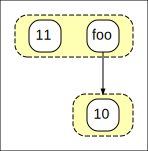

In [27]:
 # https://github.com/egraphs-good/egglog-python/blob/main/docs/reference/bindings.md?plain=1
from egglog import *
egraph = EGraph()
prog = """
(function foo (i64) i64)
(set (foo 10) 11)
"""
# acces to raw bindings via _egraph
commands = egraph._egraph.parse_program(prog)
egraph._egraph.run_program(*commands)
egraph
EGraph.function = lambda self, name: self._egraph.get_function(name)

In [23]:
from egglog.bindings import *
egraph = EGraph()
prog = """
(function foo (i64) i64)
(set (foo 10) 11)
(print-function foo 10)

"""
commands = egraph.parse_program(prog)
egraph.run_program(*commands)

class Expr():
    def __init__(self, name):
        self.name = name
        self.egraph
    def __call__(self, *args):
        return Function(self.name, *args)
    def __repr__(self):
        return f"({self.name} {' '.join(map(repr, self.args))})"
    def __str__(self):
        return repr(self)

class EGraph0(EGraph):
    def function(name, *args):
        return egraph.run_program(*egraph.parse_program(f"(function {name} {' '.join(args)})"))
    def relation(name, *args):
        return egraph.run_program(*egraph.parse_program(f"(relation {name} {' '.join(args)})"))
    def set(*args):
    




['(\n   (foo 10) -> 11\n)\n']

# Fancy Funky Extraction

Roughly, extraction is taking compact pile of stuff in an egraph an gettng a term out. Ultimately, ther systems are ingesting terms, so for applications you need this.

Part of the appeal of the egg approach is that you can extract _good_ terms.

In this post, I don't want to talk about how to best solve for good terms, but instead some interesting varietions on the expressivity or semantics of extraction.

For an extraction elgorithm, there is a question
`(Egraph, Term) -> (Cost, Term)`

A different fascinating possibility raised by _ is considerng the extraction problem that wants to produce a set of equatons equivalent to an egraph (a set of equations that should you add those terms and union them in a frsh egraph, you get back the same egraph). This is a methodology for finding a "good" set of equations rather than a single good term.
`Egraph -> [(Term, Term)]`
They phrased this as a form of quantifier elimination.

It is a reasonable problem that you may insert a pile of equations and receive a "solution".
Solutions are often equations with an isolated left hand side, and a right hand side that only contains certain entities.
These are definitions.

Scoping. Egraphs and egglog have a pretty bad story here.
You can use egglog as a theorem prover, but you have to skolemize and herbrandize yourself. This situation is reminiscent of a resolution solver, where the basic operational mechanims does not really support quantifiers either, so clausal form is produced in a preprocessing pass.

Termination

The most naive mode of extraction is a term model. In this model, we pay for a term every time we use it.

It is often closer to the truth to consider a DAG model, in which you only need to pay for a term once and may reuse it again and again.

There is also a spectrum between them.

Cycle breaking.
In the PEG paper using egraphs as an IR, they produced egraphs that are not produceable from a process of adding terms and term rewriting rules. These egraphs were not "well founded" in some sense that it would be interesting to have a nice definition of. There is intrinsic knot tying.

The simplest example is an egraph with a single looping enode and eclass. It perhaps represents the truly infinite term `f(f(f(f(f(f(...))))))`

```mermaid
f self loop.
```

If you run an iterative greedy dynamic programming approach, it does not terminate or terminates with infnite cost. If you start trying to get a term out, that will also not terminate because there is no term to be had in there.

You can kind of produce egraphs like this if you allow yourself access to a raw fresh-eid, or if you make a temporary nonsense placeholder to tie the knot with, whch you subsequently set the cost to infinity.

While PEGs are couched in the language and greek letters remiscent of SSA-like compiler IRs, to my mind basically it is an equational theory of coinductive streams, akin to what you find in Haskell. The contents of the streams are the symbolic state of the system.

# Examples Where Methods Help

Greedy did so well that  started to be convinced that it was actual optimal or guaranteed some fraction of optimal. Taking big benchmarks where a priori no one knows the optimal answer made this unclear.
It is not the case. You can design some simple examples where the greedy heuristic is arbitrarily bad.

# Methods

The extraction gym is a good place to look to see some ideas people have had.
Brute Force.

Greedy.

ZDD
ILP
MaxSAT
Answer Set Programming

One I really like is from the Kestrel talk, monte carlo optimization. It is a somewhat sad fact of life that exact optimizatin methods are actually not _that_ useful. This is because 1. they are often computationally expensive 2. heuristics are often pretty good and very fast 2. they can require mangled modelling to fit into thir language 3. Optimizing beyond the fidelity of the model to reality is pointless and in fact often counterproductive. This is a form of overfitting, the bane of machine learning.
Figuring out an accurate model of a cpu is very very hard.
Profile guided optimization.
So just run the program! Maybe weight your sampling a bit towards things you think are good.
